In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans , DBSCAN

In [51]:
!pip install scikit-fuzzy

In [52]:
data = pd.read_csv('/content/creditcard_2023.csv')

In [53]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [54]:
data.shape

(93671, 31)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93671 entries, 0 to 93670
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      93671 non-null  int64  
 1   V1      93671 non-null  float64
 2   V2      93671 non-null  float64
 3   V3      93671 non-null  float64
 4   V4      93671 non-null  float64
 5   V5      93671 non-null  float64
 6   V6      93671 non-null  float64
 7   V7      93671 non-null  float64
 8   V8      93671 non-null  float64
 9   V9      93671 non-null  float64
 10  V10     93671 non-null  float64
 11  V11     93671 non-null  float64
 12  V12     93671 non-null  float64
 13  V13     93671 non-null  float64
 14  V14     93671 non-null  float64
 15  V15     93671 non-null  float64
 16  V16     93671 non-null  float64
 17  V17     93671 non-null  float64
 18  V18     93671 non-null  float64
 19  V19     93671 non-null  float64
 20  V20     93671 non-null  float64
 21  V21     93671 non-null  float64
 22

In [56]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [57]:
data[data['V21'].isna()]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [58]:
## check the number of fraudulent  and not
fraudulent = data[data['Class']==1].shape[0]
not_fraudulent = data[data['Class']==0].shape[0]

In [59]:
data['Class'].value_counts()

0.0    93455
1.0      215
Name: Class, dtype: int64

In [60]:
fraudulent , not_fraudulent

(215, 93455)

In [68]:
data.drop([93670],axis=0,inplace=True)

In [69]:
data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

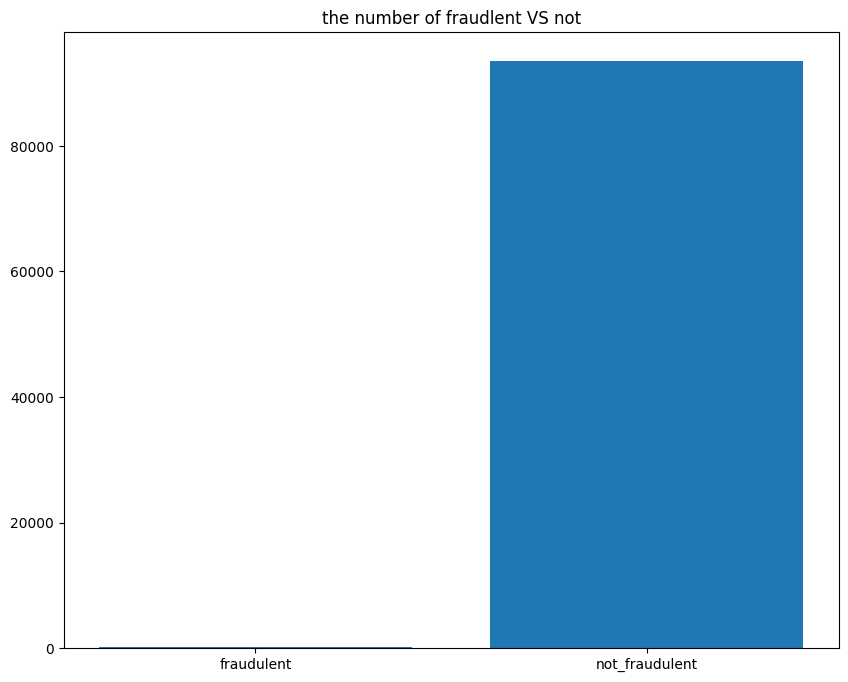

In [70]:
plt.figure(figsize=(10,8))
plt.bar(['fraudulent' , 'not_fraudulent'],[fraudulent , not_fraudulent])
plt.title("the number of fraudlent VS not")
plt.show()

In [ ]:
data.drop('id',axis=1,inplace=True)

In [72]:
data.shape

(93669, 30)

In [73]:
x = data.drop('Class',axis=1)
y = data['Class']

In [74]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , shuffle=True, random_state=40, stratify=y)

# check outliers

<Figure size 1600x800 with 0 Axes>

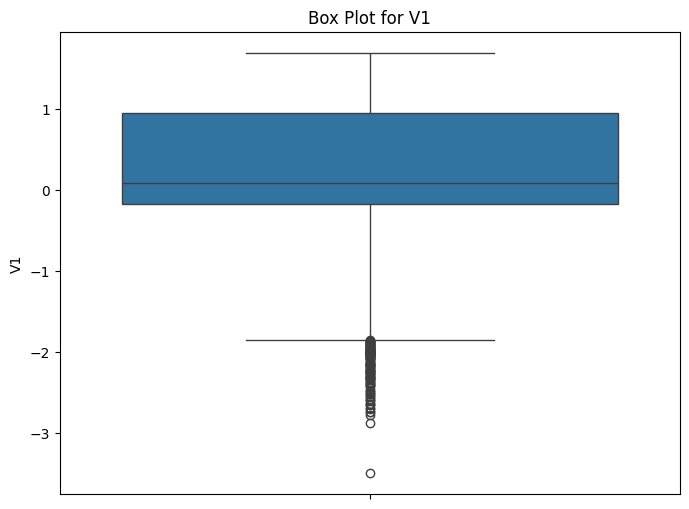

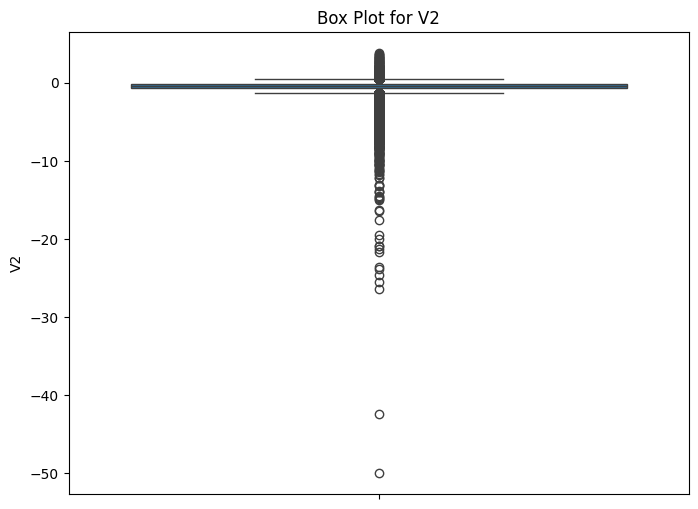

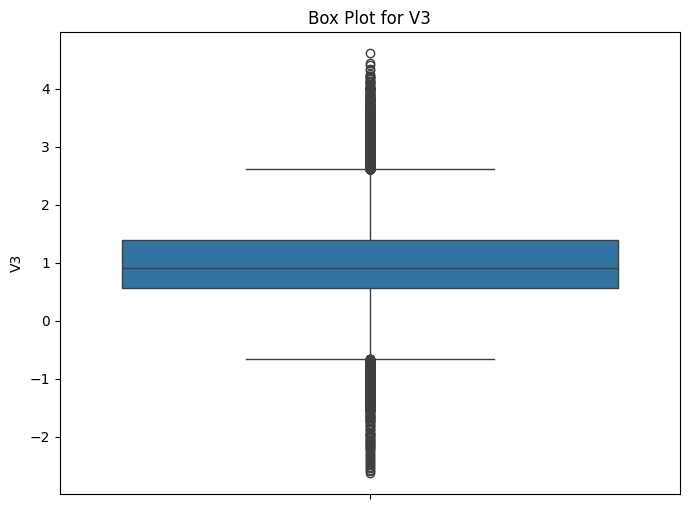

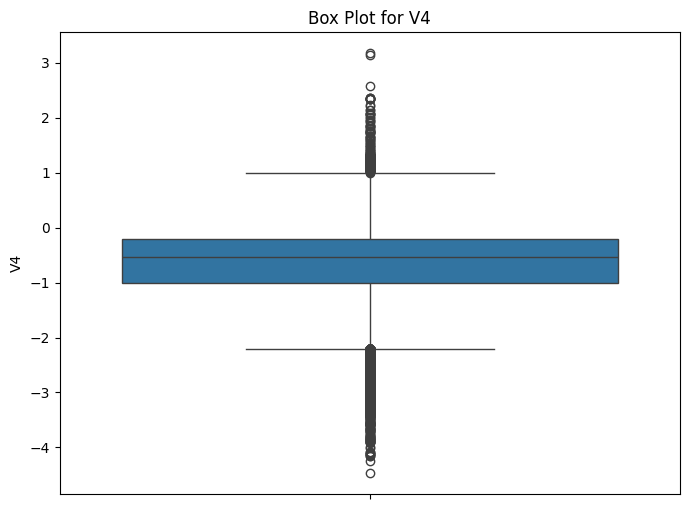

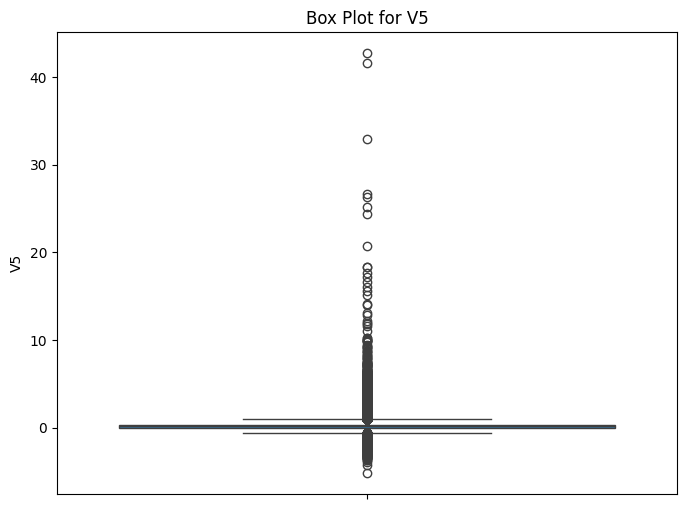

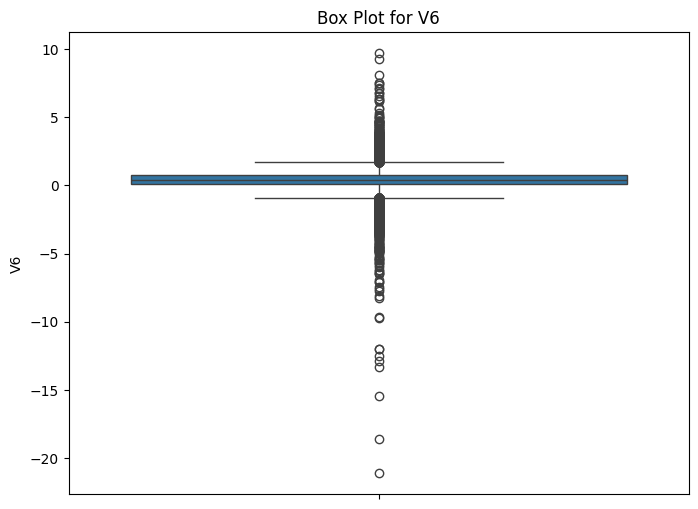

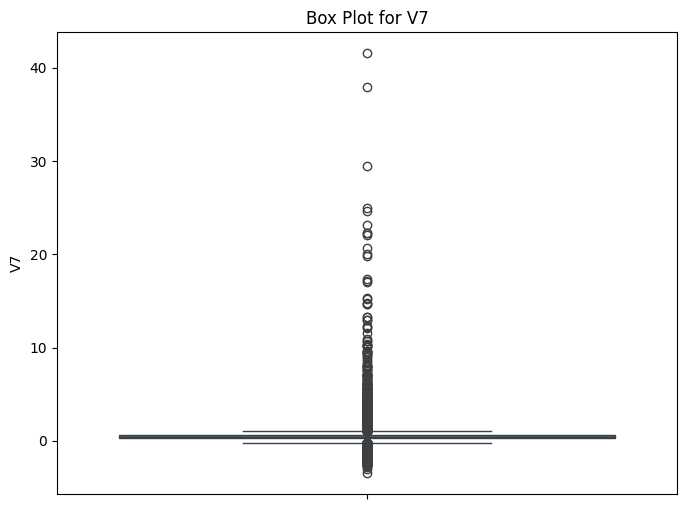

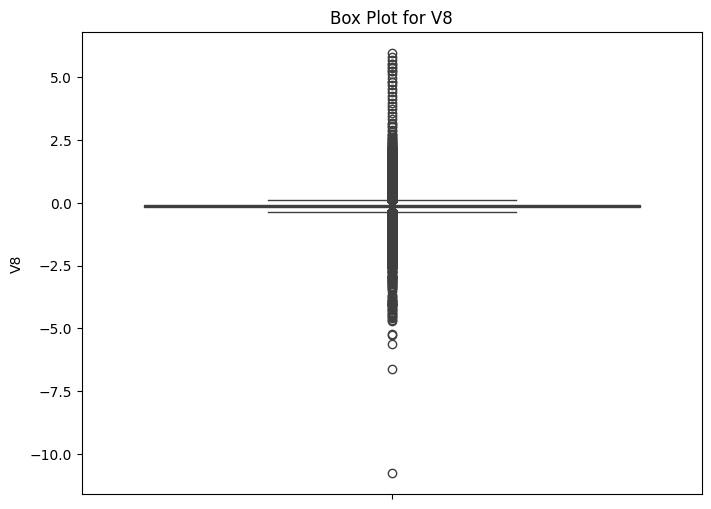

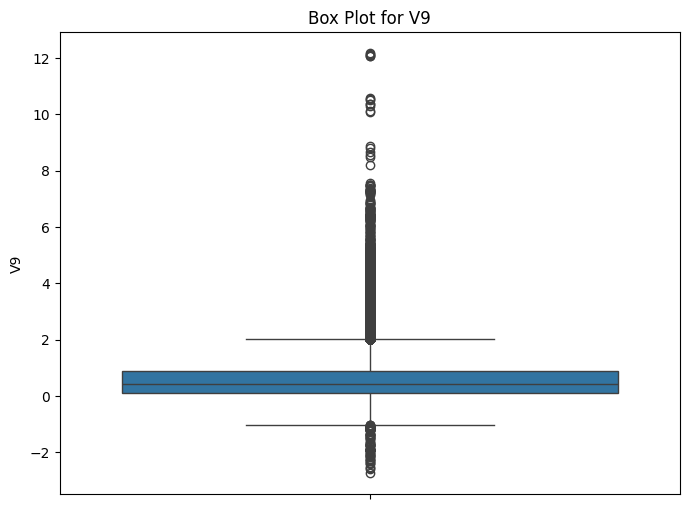

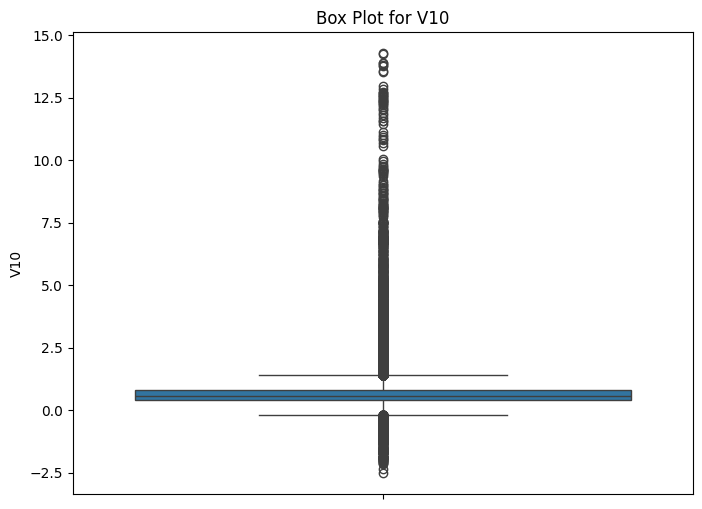

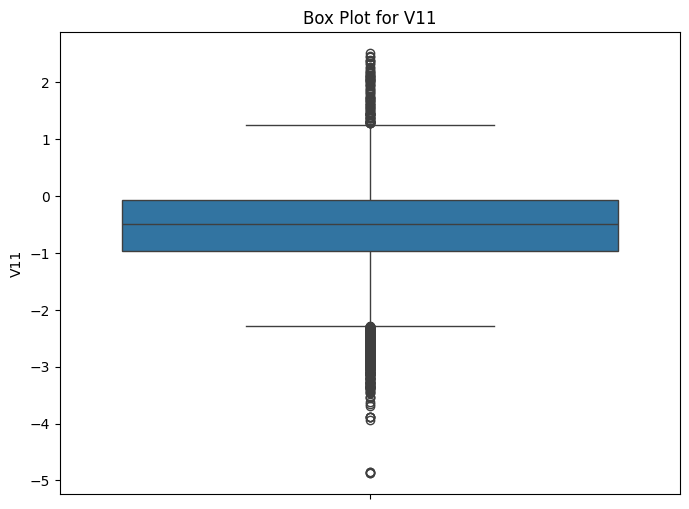

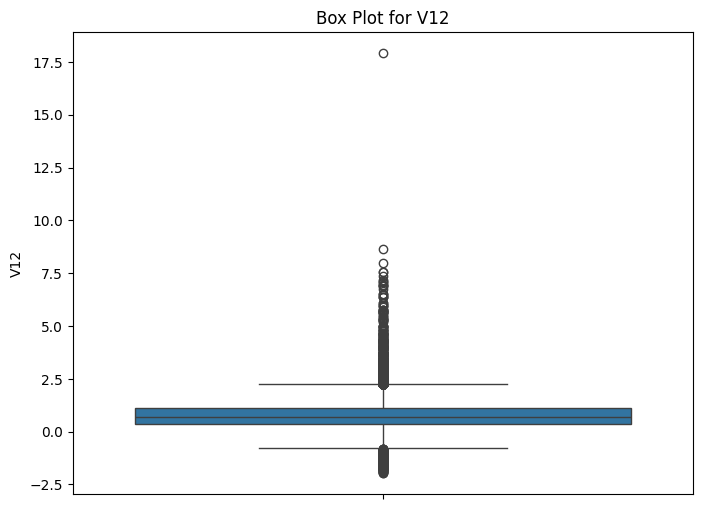

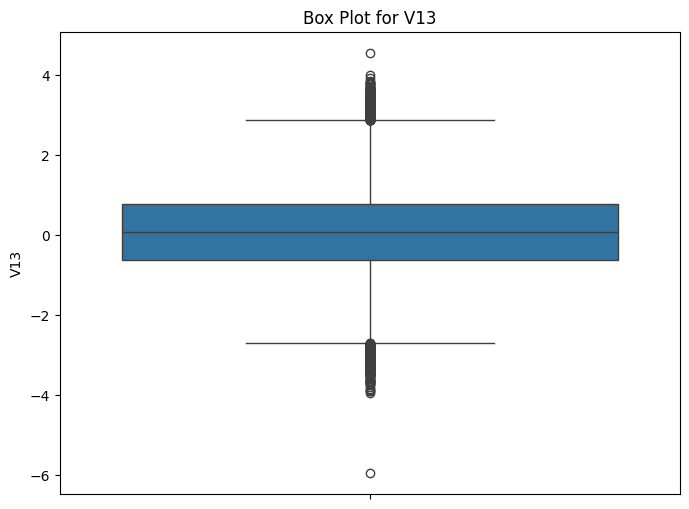

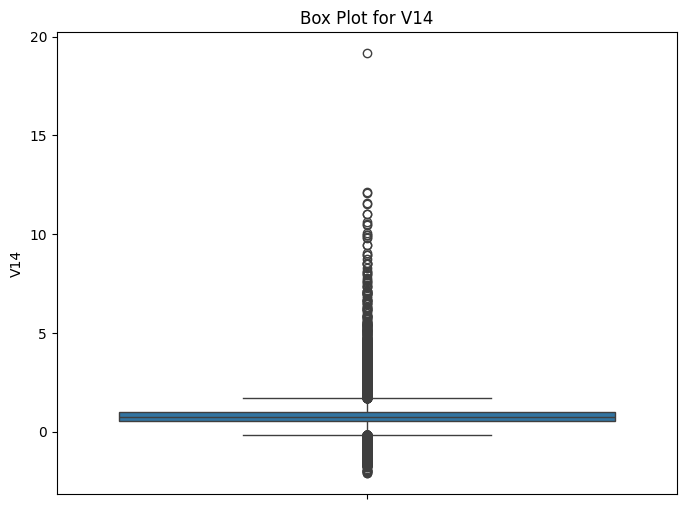

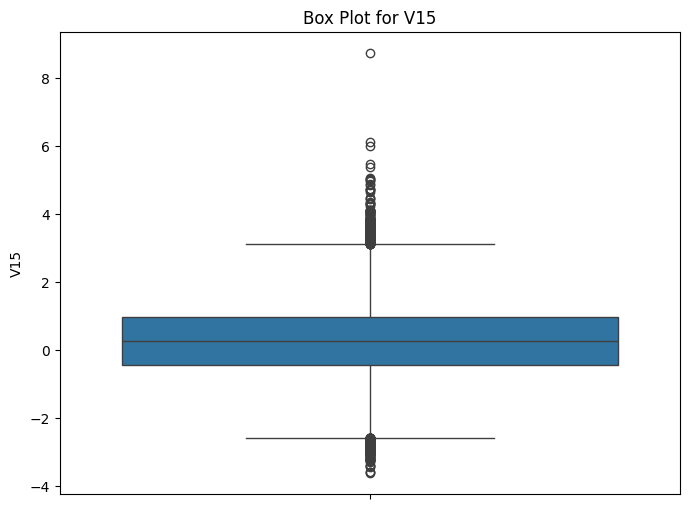

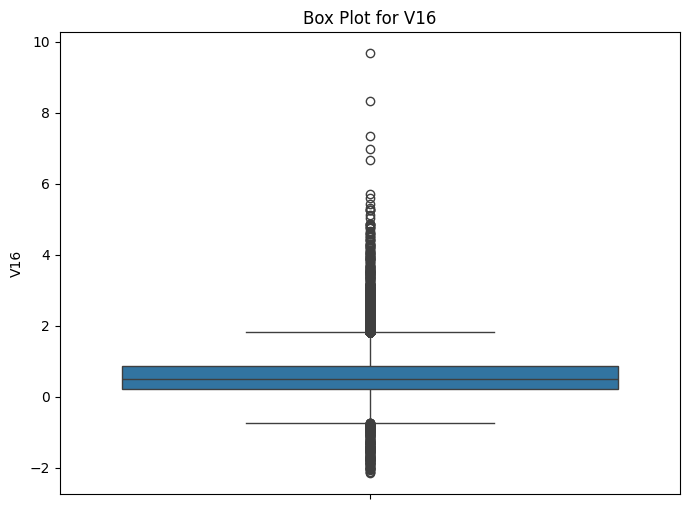

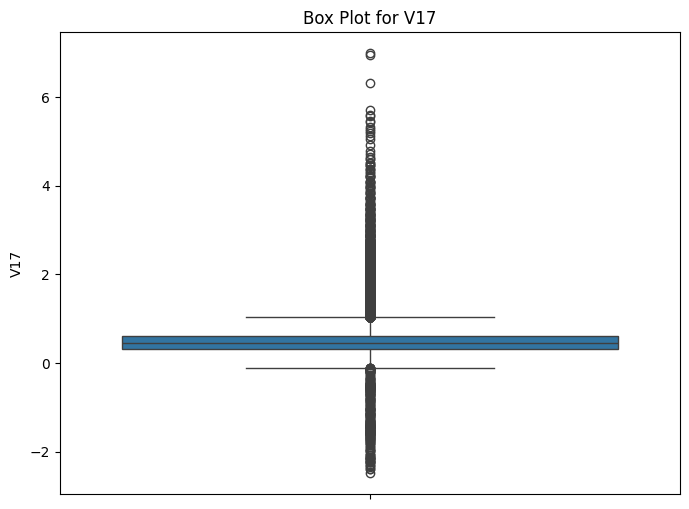

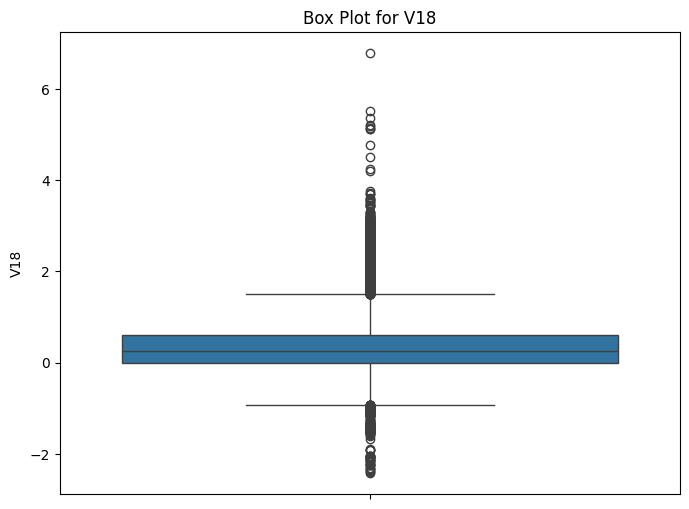

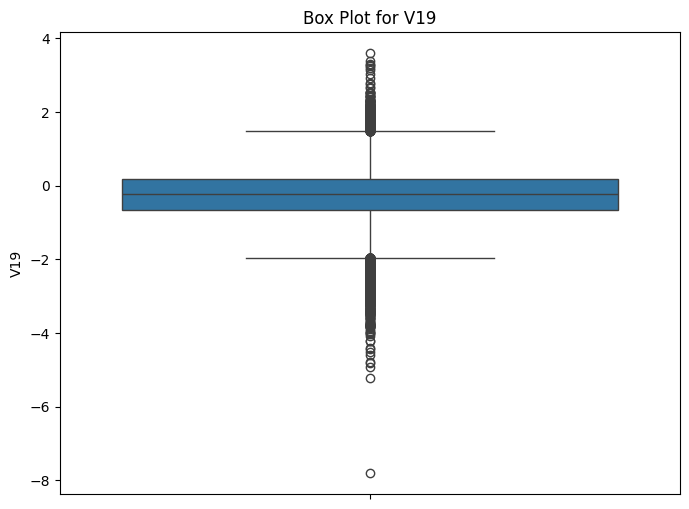

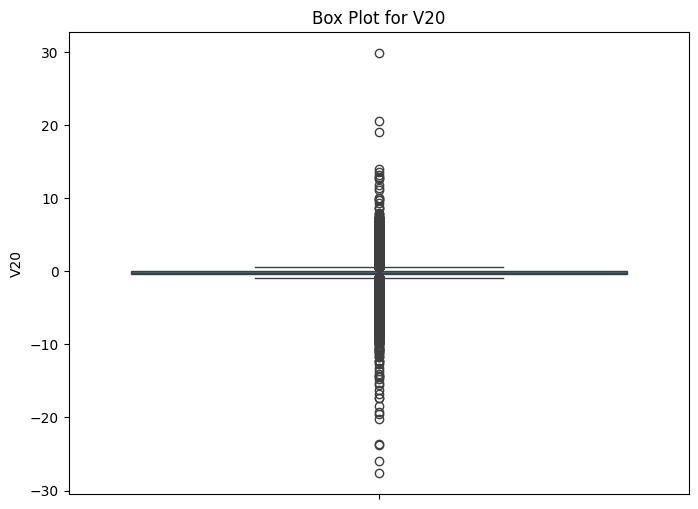

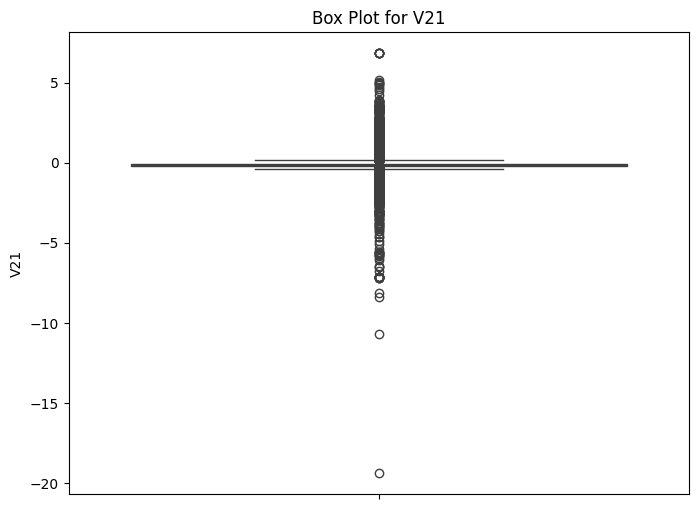

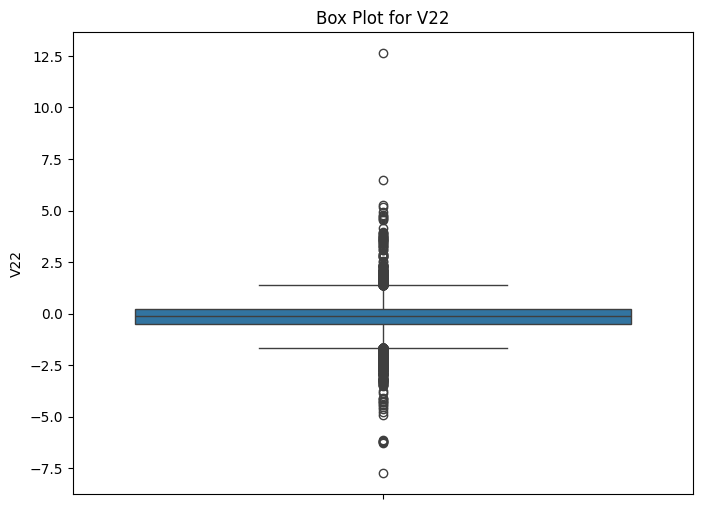

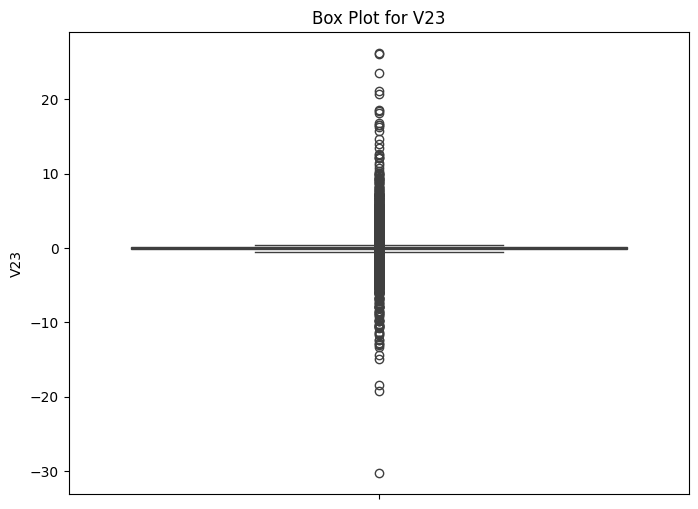

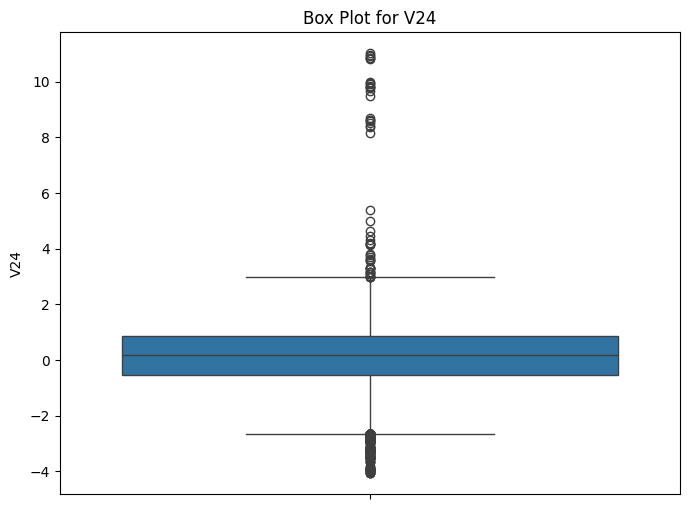

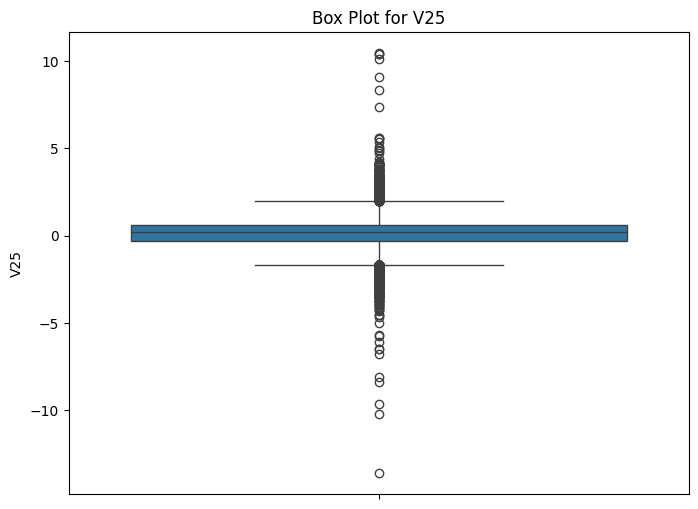

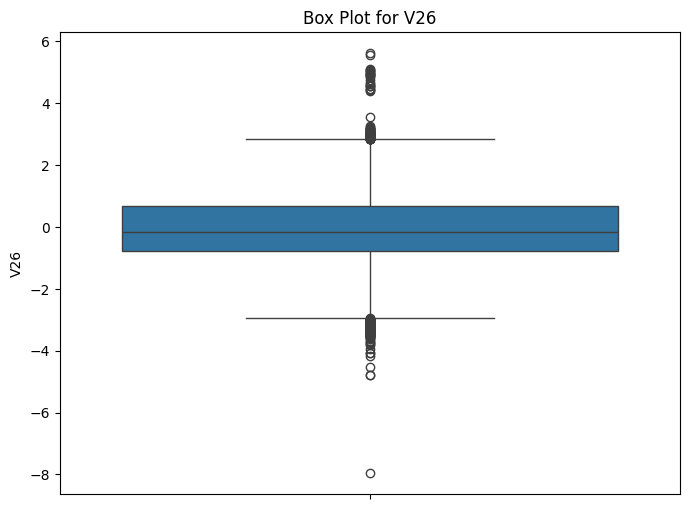

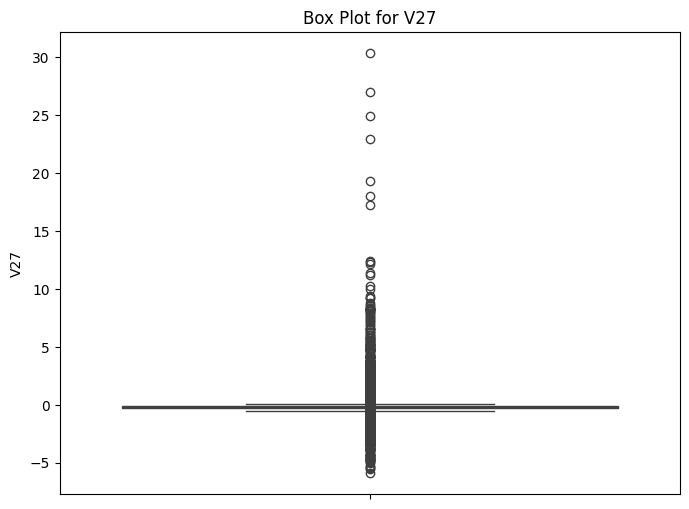

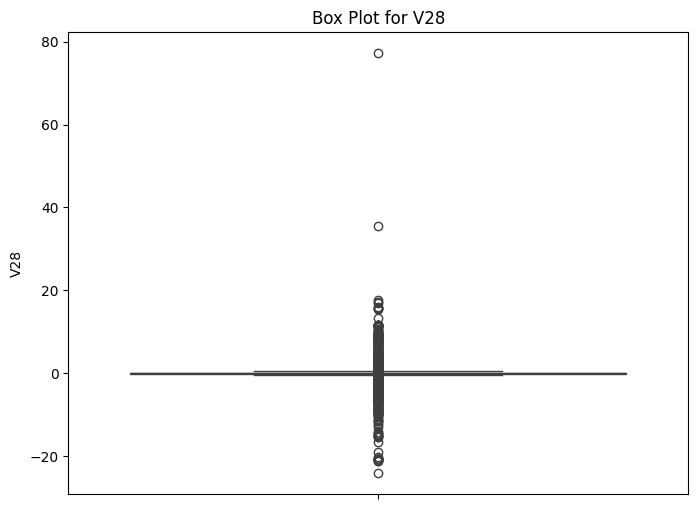

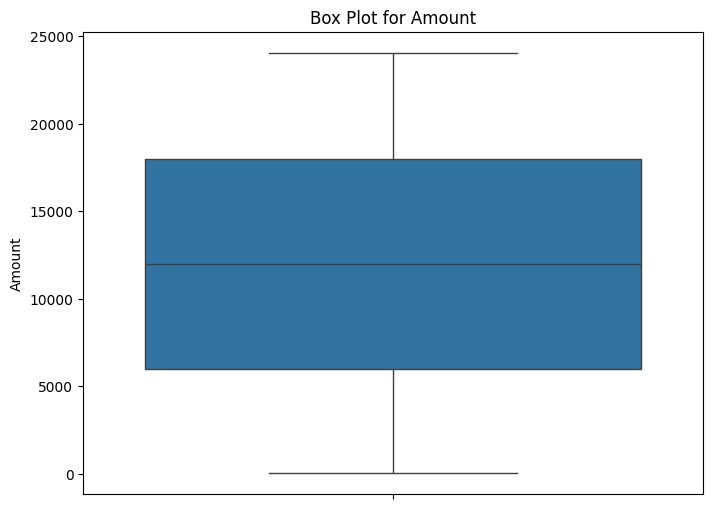

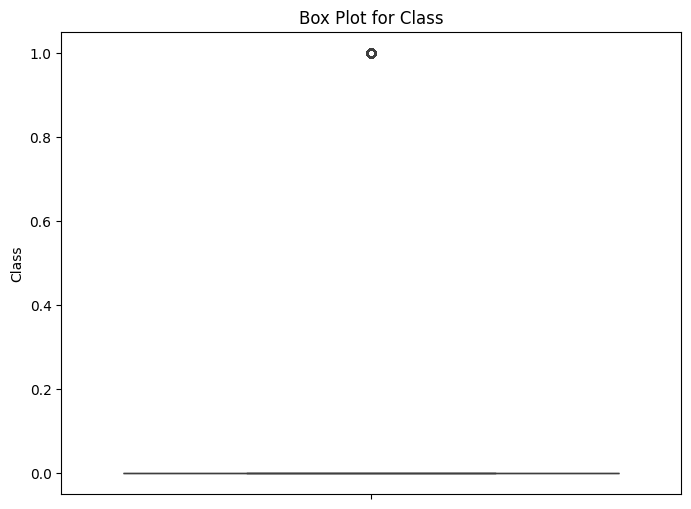

In [75]:
# Set the size of the figure
plt.figure(figsize=(16, 8))

# Iterate through each numerical feature and create a box plot
for column in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])  # Use 'y' instead of 'x'
    plt.title(f'Box Plot for {column}')
    plt.show()

# kmeans model

In [76]:
kmeans = KMeans(n_clusters=2,n_init='auto')

In [77]:
kmeans.fit(x_train)

KMeans(n_clusters=2, n_init='auto')

In [78]:
kmeans.cluster_centers_

array([[ 3.15438810e-01, -5.03698213e-01,  1.00813807e+00,
        -6.57548622e-01,  2.25564180e-01,  4.90595642e-01,
         4.45384997e-01, -1.30475023e-01,  5.65304447e-01,
         6.52995491e-01, -5.64751100e-01,  7.33221851e-01,
         8.86165126e-02,  8.41656415e-01,  2.50250916e-01,
         5.69533861e-01,  4.97056936e-01,  3.49020031e-01,
        -2.61297655e-01, -1.34562542e-01, -1.21235470e-01,
        -1.17867024e-01, -4.63420277e-02,  1.45694633e-01,
         1.49425770e-01, -1.06113645e-02, -2.16438408e-01,
        -9.24041666e-02,  6.05159498e+03],
       [ 3.06967021e-01, -5.05652973e-01,  1.00351764e+00,
        -6.49936257e-01,  2.23500551e-01,  4.90375620e-01,
         4.52656925e-01, -1.32976212e-01,  5.59184218e-01,
         6.51175059e-01, -5.73417814e-01,  7.38051950e-01,
         8.73007080e-02,  8.41691573e-01,  2.56156615e-01,
         5.71337615e-01,  5.00220202e-01,  3.44514094e-01,
        -2.66489105e-01, -1.40675943e-01, -1.20965043e-01,
        -1.21

In [79]:
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 1], dtype=int32)

In [80]:
kmeans.inertia_

843139060820.8844

In [81]:
kmeans.predict(x_test[0:20])

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int32)

In [82]:
y_test[0:20]

87693    0.0
168      0.0
71268    0.0
73863    0.0
81960    0.0
14717    0.0
46598    0.0
48079    0.0
44135    0.0
59990    0.0
85317    0.0
90327    0.0
23896    0.0
77237    0.0
51184    0.0
7412     0.0
4312     0.0
21567    0.0
35599    0.0
7428     0.0
Name: Class, dtype: float64

# DBSCAN model

In [83]:
dbscan = DBSCAN(eps=2.2)

In [84]:
dbscan.fit(x_train)

DBSCAN(eps=2.2)

In [86]:
print(pd.unique(dbscan.labels_))

[-1  0  1  2  3]


In [87]:
dbscan.fit_predict(x_test[0:30])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [88]:
y_test[0:30]

87693    0.0
168      0.0
71268    0.0
73863    0.0
81960    0.0
14717    0.0
46598    0.0
48079    0.0
44135    0.0
59990    0.0
85317    0.0
90327    0.0
23896    0.0
77237    0.0
51184    0.0
7412     0.0
4312     0.0
21567    0.0
35599    0.0
7428     0.0
53310    0.0
49371    0.0
18574    0.0
82670    0.0
77510    0.0
66447    0.0
32795    0.0
62018    0.0
25128    0.0
35856    0.0
Name: Class, dtype: float64

# Fuzzy Cmeans model

In [89]:
from skfuzzy.cluster import cmeans

In [90]:
centers, u, u0, d, jm, p, fpc = cmeans(x_train,2,2,0.001,maxiter=1000)

In [91]:
centers

array([[-1.12988228e-01,  2.35903840e-01,  2.58049550e-02, ...,
         8.57134139e-02,  2.38257602e-01,  1.05040847e-01],
       [ 3.83872000e+03,  2.45197000e+03,  2.14378300e+04, ...,
         6.14891000e+03,  1.61471900e+04,  1.95018200e+04]])

In [92]:
u

array([[9.99999998e-01, 9.99999995e-01, 9.99999994e-01, 9.99999994e-01,
        9.99999998e-01, 9.99999997e-01, 9.99999998e-01, 9.99999999e-01,
        9.99999996e-01, 9.99999997e-01, 9.99999995e-01, 9.99999996e-01,
        9.99999995e-01, 9.99999996e-01, 9.99999995e-01, 9.99999998e-01,
        9.99999999e-01, 9.99999998e-01, 9.99999997e-01, 9.99999996e-01,
        9.99999999e-01, 9.99999998e-01, 9.99999998e-01, 9.99999994e-01,
        9.99999997e-01, 9.99999994e-01, 9.99999998e-01, 9.99999997e-01,
        5.20679657e-20],
       [2.16648098e-09, 4.90015267e-09, 6.11666835e-09, 5.50891735e-09,
        2.05707145e-09, 3.10844999e-09, 2.05469729e-09, 8.38554332e-10,
        3.59853894e-09, 3.05316863e-09, 4.67679448e-09, 3.84148936e-09,
        5.49785035e-09, 4.00831531e-09, 5.37939738e-09, 2.43055133e-09,
        1.19935887e-09, 1.87842951e-09, 3.45835678e-09, 3.53920669e-09,
        9.28789056e-10, 2.06813257e-09, 2.36390053e-09, 6.00793026e-09,
        2.59261202e-09, 5.98775619e-09,

In [93]:
u0

array([[0.54016041, 0.89945013, 0.59169383, 0.33234941, 0.888083  ,
        0.99028866, 0.65016432, 0.38650581, 0.58959832, 0.64345967,
        0.73439527, 0.55924142, 0.20894337, 0.0549898 , 0.5660044 ,
        0.39694915, 0.43761349, 0.4988176 , 0.44510919, 0.6123958 ,
        0.42270128, 0.49596262, 0.88972778, 0.52664851, 0.27084269,
        0.69358124, 0.4294184 , 0.28635629, 0.49626453],
       [0.45983959, 0.10054987, 0.40830617, 0.66765059, 0.111917  ,
        0.00971134, 0.34983568, 0.61349419, 0.41040168, 0.35654033,
        0.26560473, 0.44075858, 0.79105663, 0.9450102 , 0.4339956 ,
        0.60305085, 0.56238651, 0.5011824 , 0.55489081, 0.3876042 ,
        0.57729872, 0.50403738, 0.11027222, 0.47335149, 0.72915731,
        0.30641876, 0.5705816 , 0.71364371, 0.50373547]])

In [94]:
d

array([[1.71120937e+02, 2.57366844e+02, 2.87517524e+02, 2.72888277e+02,
        1.66744954e+02, 2.04971127e+02, 1.66646333e+02, 1.06464121e+02,
        2.20537254e+02, 2.03138302e+02, 2.51433843e+02, 2.27857815e+02,
        2.72601457e+02, 2.32751343e+02, 2.69646000e+02, 1.81247071e+02,
        1.27319557e+02, 1.59339037e+02, 2.16210191e+02, 2.18721174e+02,
        1.12045884e+02, 1.67196248e+02, 1.78751595e+02, 2.84965617e+02,
        1.87196976e+02, 2.84489647e+02, 1.62215054e+02, 2.14295444e+02,
        3.67645935e+06],
       [3.67642499e+06, 3.67661192e+06, 3.67626536e+06, 3.67664543e+06,
        3.67644447e+06, 3.67638297e+06, 3.67639221e+06, 3.67652624e+06,
        3.67636700e+06, 3.67634636e+06, 3.67662715e+06, 3.67632681e+06,
        3.67647582e+06, 3.67630264e+06, 3.67643733e+06, 3.67636478e+06,
        3.67638126e+06, 3.67641674e+06, 3.67655665e+06, 3.67652789e+06,
        3.67652362e+06, 3.67652344e+06, 3.67650641e+06, 3.67646149e+06,
        3.67646185e+06, 3.67649866e+06,

In [95]:
jm

array([6.55786410e+12, 6.47023792e+12, 4.98049199e+12, 6.38414905e+11,
       1.28180292e+06])

In [96]:
p

5

In [97]:
fpc

0.9999999934754669